In [30]:
# Importing Libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import Markdown as md
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from scipy.optimize import minimize

# Polynomial Regression on Posted Wait Time Data

In [31]:
# Opening + Cleaning Posted Wait Time Data
df = pd.read_csv('Posted_Wait_Times.csv')
df['dt'] = pd.to_datetime(df['datetime'])
df.drop(['date', 'datetime', 'SACTMIN'], axis = 1, inplace = True)
df['date'] = df['dt'].dt.date
df['time'] = df['dt'].dt.time
df['hour'] = df['dt'].dt.hour
df['month'] = df['dt'].dt.month
df.drop(['date'], axis = 1, inplace = True)
df.rename(columns = {'SPOSTMIN': 'wait'}, inplace = True)
df.dropna(inplace = True)
df = df[df['wait'] > 0]
df = df[['dt', 'month', 'hour', 'time', 'wait']]

# Creating Data Frame for November 
november = df[(df['month'] == 11) & (df['hour'] >= 8) & (df['hour'] <= 20)].reset_index().drop('index', axis = 1)


In [32]:
# Creating Feature Matrix + Train/Test/Split
df2 = november[['hour', 'wait']]
X = df2[['hour']].values.reshape(-1,1)
y = df2[['wait']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [33]:
# Running Polynomial Regression from Order 1 to Order 10

#Linear Regression
lm = LinearRegression()
model1 = lm.fit(X_train, y_train)
y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)
train_error1 = mean_squared_error(y_train, y_train_pred1)
test_error1 = mean_squared_error(y_test, y_test_pred1)

#2nd Order Regression
poly_features2 = PolynomialFeatures(degree = 2)
X_train_poly2 = poly_features2.fit_transform(X_train)
X_test_poly2 = poly_features2.fit_transform(X_test)
pm2 = LinearRegression()
model2 = pm2.fit(X_train_poly2, y_train)
y_train_pred2 = model2.predict(X_train_poly2)
y_test_pred2 = model2.predict(X_test_poly2)
train_error2 = mean_squared_error(y_train, y_train_pred2)
test_error2 = mean_squared_error(y_test, y_test_pred2)

#3rd Order Regression
poly_features3 = PolynomialFeatures(degree = 3)
X_train_poly3 = poly_features3.fit_transform(X_train)
X_test_poly3 = poly_features3.fit_transform(X_test)
pm3 = LinearRegression()
model3 = pm3.fit(X_train_poly3, y_train)
y_train_pred3 = model3.predict(X_train_poly3)
y_test_pred3 = model3.predict(X_test_poly3)
train_error3 = mean_squared_error(y_train, y_train_pred3)
test_error3 = mean_squared_error(y_test, y_test_pred3)

#4th Order Regression
poly_features4 = PolynomialFeatures(degree = 4)
X_train_poly4 = poly_features4.fit_transform(X_train)
X_test_poly4 = poly_features4.fit_transform(X_test)
pm4 = LinearRegression()
model4 = pm4.fit(X_train_poly4, y_train)
y_train_pred4 = model4.predict(X_train_poly4)
y_test_pred4 = model4.predict(X_test_poly4)
train_error4 = mean_squared_error(y_train, y_train_pred4)
test_error4 = mean_squared_error(y_test, y_test_pred4)

#6th Order Regression
poly_features6 = PolynomialFeatures(degree = 6)
X_train_poly6 = poly_features6.fit_transform(X_train)
X_test_poly6 = poly_features6.fit_transform(X_test)
pm6 = LinearRegression()
model6 = pm6.fit(X_train_poly6, y_train)
y_train_pred6 = model6.predict(X_train_poly6)
y_test_pred6 = model6.predict(X_test_poly6)
train_error6 = mean_squared_error(y_train, y_train_pred6)
test_error6 = mean_squared_error(y_test, y_test_pred6)

In [35]:
# Creating Data Frames
frame2 = pd.DataFrame(data = {'hour' : X_train.flatten(), 
                              'wait' : y_train_pred2.flatten()}).groupby('hour').mean().sort_index()
frame4 = pd.DataFrame(data = {'hour' : X_train.flatten(), 
                              'wait' : y_train_pred4.flatten()}).groupby('hour').mean().sort_index()
frame6 = pd.DataFrame(data = {'hour' : X_train.flatten(), 
                              'wait' : y_train_pred6.flatten()}).groupby('hour').mean().sort_index()
november_grouped = november.groupby('hour').mean()


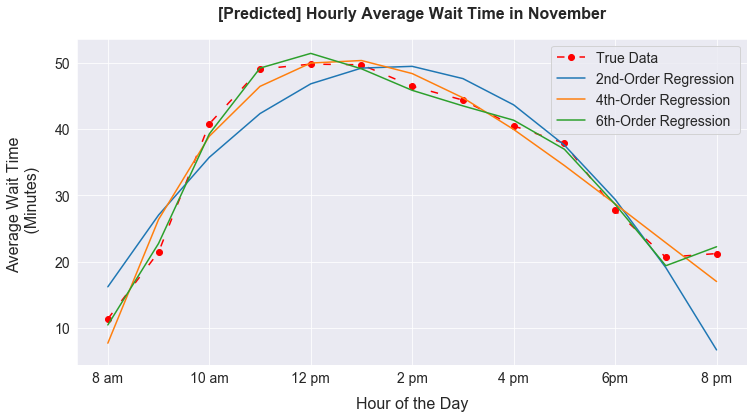

In [36]:
# Plotting Predicted Values
frame2 = pd.DataFrame(data = {'hour' : X_train.flatten(), 
                              'wait' : y_train_pred2.flatten()}).groupby('hour').mean().sort_index()
frame4 = pd.DataFrame(data = {'hour' : X_train.flatten(), 
                              'wait' : y_train_pred4.flatten()}).groupby('hour').mean().sort_index()
frame6 = pd.DataFrame(data = {'hour' : X_train.flatten(), 
                              'wait' : y_train_pred6.flatten()}).groupby('hour').mean().sort_index()
november_grouped = november.groupby('hour').mean()

sns.set_style('darkgrid')
figRa, axRa = plt.subplots(figsize = (12, 6))

plt.plot(november_grouped.index, november_grouped['wait'], linestyle = (0, (5,10)), marker = 'o', c = 'r', label = 'True Data')
plt.plot(frame2.index, frame2['wait'], label = '2nd-Order Regression')
plt.plot(frame4.index, frame4['wait'], label = '4th-Order Regression')
plt.plot(frame6.index, frame6['wait'], label = '6th-Order Regression')

plt.title('[Predicted] Hourly Average Wait Time in November', fontsize = 16, pad = 20, fontweight = 'semibold')
plt.xlabel('Hour of the Day', fontsize = 16, labelpad = 10)
plt.ylabel('Average Wait Time \n (Minutes)', fontsize = 16, labelpad = 15)
plt.xticks([8,10,12,14,16,18,20], ['8 am', '10 am', '12 pm', '2 pm', '4 pm', '6pm', '8 pm'], fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(prop={'size': 14})

figRa.savefig('figRa.pdf')


In [9]:
#Creating Cross Validation + Errors Data Frame

test_errors = []
train_errors = []
for i in range(1,11): 
    y_train_current = y_train
    y_test_current = y_test
    X_train_current = PolynomialFeatures(degree = i).fit_transform(X_train)
    X_test_current = PolynomialFeatures(degree = i).fit_transform(X_test)
    model = LinearRegression().fit(X_train_current, y_train_current)
    
    train_rmse = np.sqrt(mean_squared_error(y_train_current, model.predict(X_train_current).flatten()))
    train_errors = np.append(train_errors, train_rmse)
    
    test_rmse = np.sqrt(mean_squared_error(y_test_current, model.predict(X_test_current).flatten()))
    test_errors = np.append(test_errors, test_rmse)
    
regression_df1 = pd.DataFrame()
regression_df1['Regression Type'] = ['Degree-' + str(order) + ' Polynomial' for order in range(1,11)]
regression_df1['Train Error'] = np.round(train_errors, 3)
regression_df1['Test Error'] = np.round(test_errors, 3)

crossvalidation = KFold(n_splits=5, random_state=1, shuffle=False)
total_score = []
for i in range(1,11):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    model = lm.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    total_score = np.append(total_score, scores)
regression_df = pd.DataFrame()
regression_df['Regression Type'] = ['Degree-' + str(order) + ' Polynomial' for order in range(1,11)]
regression_df['RMSE'] = np.round(np.array([25.634305744880873, 23.389330953566226, 23.120532713227643, 23.127462673757762, 23.12993466271858, 23.044671778090684, 23.04481202950483, 23.044859569459703,  23.047102466776305, 23.050022635585513]), 3)
regression_df['STD'] = np.round(np.array([11.969822654542057, 10.7124043947728, 10.854200283971895, 10.844544549366471, 10.838287601973757, 10.816940757152038,10.818146197513986,10.809363710112518, 10.81223137452443,10.813004433120884]), 3)

totaldf = pd.merge(regression_df, regression_df1)
totaldf = totaldf.rename(columns = {'RMSE': 'Cross-Val RMSE',
                         'STD':'Cross-Val Std',
                        'Train Error': 'Train RMSE', 
                        'Test Error' : 'Test RMSE'})
totaldf = totaldf[['Regression Type', 'Train RMSE', 'Cross-Val RMSE', 'Cross-Val Std', 'Test RMSE']]
totaldf

,Regression Type,Train RMSE,Cross-Val RMSE,Cross-Val Std,Test RMSE
0,Degree-1 Polynomial,25.007,25.634,11.970,25.219
1,Degree-2 Polynomial,22.505,23.389,10.712,22.706
2,Degree-3 Polynomial,22.232,23.121,10.854,22.456
3,Degree-4 Polynomial,22.227,23.127,10.845,22.458
4,Degree-5 Polynomial,22.225,23.130,10.838,22.455
5,Degree-6 Polynomial,22.112,23.045,10.817,22.371
6,Degree-7 Polynomial,22.102,23.045,10.818,22.367
7,Degree-8 Polynomial,22.100,23.045,10.809,22.360
8,Degree-9 Polynomial,22.101,23.047,10.812,22.363
9,Degree-10 Polynomial,22.104,23.050,10.813,22.368


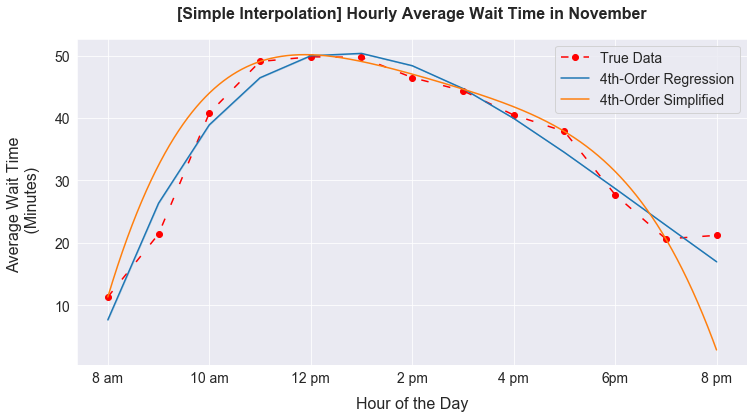

In [38]:
# Plotting Simple Interp + 4th Order Regression
df5 = pd.DataFrame()
df5['hour1'] = X_train.flatten()
df5['ypred4'] = y_train_pred4.flatten()
df5['hour1'].replace({8:0, 9:1, 10:2, 11:3, 12:4, 13:5, 14:6, 15:7, 16:8, 17:9, 18:10, 19:11, 20:12}, inplace = True)
df5.head(5)

a = november_grouped.reset_index().reset_index().drop(['hour', 'month'], axis = 1).rename(columns = {'index' : 'hour'})
a

df5 = pd.DataFrame()
df5['hour1'] = X_train.flatten()
df5['ypred4'] = y_train_pred4.flatten()
df5['hour1'].replace({8:0, 9:1, 10:2, 11:3, 12:4, 13:5, 14:6, 15:7, 16:8, 17:9, 18:10, 19:11, 20:12}, inplace = True)
df5.head(5)

def f(t): 
    return -.0263577*t**4 + .675513*t**3 + -6.62629*t**2 + 27.0795*t + 11.3421
xxx = np.arange(0, 12, .001)

sns.set_style('darkgrid')
figRb, axRb = plt.subplots(figsize = (12, 6))

plt.plot(a.index, a['wait'], 'o',linestyle = (0, (5,10)), c = 'r', label = 'True Data')
sns.lineplot(df5['hour1'], df5['ypred4'], label = '4th-Order Regression', dashes = True)
plt.plot(xxx, f(xxx), label = '4th-Order Simplified')

plt.title('[Simple Interpolation] Hourly Average Wait Time in November', fontsize = 16, pad = 20, fontweight = 'semibold')
plt.xlabel('Hour of the Day', fontsize = 16, labelpad = 10)
plt.xticks([0,2,4,6,8,10,12], ['8 am', '10 am', '12 pm', '2 pm', '4 pm', '6pm', '8 pm'], fontsize = 14)

plt.ylabel('Average Wait Time \n (Minutes)', fontsize = 16, labelpad = 15)
plt.yticks(fontsize = 14)
plt.legend(prop={'size': 14})

figRb.savefig('figRb.pdf')

__________________________________________________________________________________________________________________

# Applying the Framework to Arrival Data

In [39]:
# Loading Rates Data + Removing Outliers 
rates = pd.read_csv('november_arrival_data.csv')
rates['day'] = pd.to_datetime(rates['date'])
rates = rates.drop('date', axis = 1)
rates = rates[['day', 'open', 'peak', 'afternoon']]
rates = rates.rename( columns = {'day' : 'Date', 
                                 'open' : '8', 
                                 'peak' : '11',
                                 'afternoon' : '4', })
rates = rates.dropna()


# Removing Outliers 
rates2 = rates.drop('Date', axis = 1)
q1 = rates2.quantile(0.25)
q3 = rates2.quantile(0.75)
IQR = q3 - q1
LB = q1 - 1.25*IQR
UB = q3 + 1.25*IQR

rates_in_8 = rates2[ (rates2['8'].between(LB[0], UB[0])) ][['8']]
rates_out_8 = rates2[ ~(rates2['8'].between(LB[0], UB[0])) ][['8']]

rates_in_11 = rates2[ (rates2['11'].between(LB[1], UB[1])) ][['11']]
rates_out_11 = rates2[ ~(rates2['11'].between(LB[1], UB[1])) ][['11']]

rates_in_4 = rates2[ (rates2['4'].between(LB[2], UB[2])) ][['4']]
rates_out_4 = rates2[ ~(rates2['4'].between(LB[2], UB[2])) ][['4']]

rates_in = pd.concat([rates_in_8,rates_in_11, rates_in_4], ignore_index=True, axis=1)
rates_out = pd.concat([rates_out_8,rates_out_11, rates_out_4], ignore_index=True, axis=1)

In [40]:
# Means & Medians after Removing Outliers

old_means = [np.mean(rates2.iloc[:,i]) for i in np.arange(0,3)]
old_medians = [np.median(rates2.iloc[:,i]) for i in np.arange(0,3)]

new_means = [np.mean(rates_in[i].dropna()) for i in np.arange(0,3)]
new_medians = [np.median(rates_in[i].dropna()) for i in np.arange(0,3)]

print('Old Means: ', np.round(old_means, 2))
print('New Means: ', np.round(new_means,2))

print('Old Medians: ', np.round(old_medians, 2))
print('New Medians: ', np.round(new_medians,2))

Old Means:  [1747.68 3540.   3372.86]
New Means:  [1651.28 3458.89 3168.  ]
Old Medians:  [1610. 3180. 3030.]
New Medians:  [1587. 3180. 2970.]


In [41]:
## Find the Coefficients for our Fourth-Order Arrival Rate Function ## 
p1 = [0.5, np.round(new_medians[0], 3)] #8:00 am
p2 = [3.5, np.round(new_medians[1], 3)] #11:00 am
p3 = [5.5, np.round(new_medians[1], 3)] #1:00 pm
p4 = [8.5, np.round(new_medians[2], 3)] #4:00 pm
p5 = [11.5,np.round(new_medians[0], 3)] #7:00 pm

A = [[p1[0]**i for i in np.arange(5)], [p2[0]**i for i in np.arange(5)], [p3[0]**i for i in np.arange(5)],
     [p4[0]**i for i in np.arange(5)], [p5[0]**i for i in np.arange(5)]]
B = [p1[1], p2[1], p3[1], p4[1], p1[1]]
x = np.linalg.inv(A).dot(B)

In [42]:
# Defining Arrival Rate Function 
def f_arrival(t): 
    return x[0] + x[1]*t + x[2]*t**2 + x[3]*t**3 + x[4]*t**4

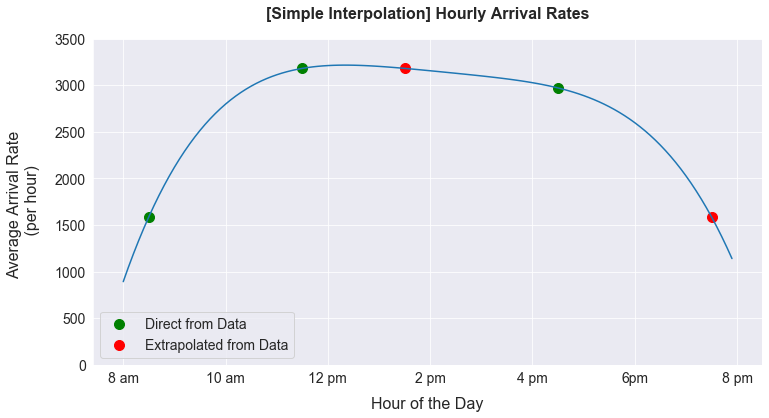

In [43]:
sns.set_style('darkgrid')
figRc, axRc = plt.subplots(figsize = (12, 6))

plt.plot(np.arange(0,12,0.1), f_arrival(np.arange(0,12,0.1)))
plt.scatter(p1[0], p1[1], s = 100, c = 'g', label = 'Direct from Data')
plt.scatter(p2[0], p2[1], s = 100, c = 'g')
plt.scatter(p3[0], p3[1], s = 100, c = 'r', label = 'Extrapolated from Data')
plt.scatter(p4[0], p4[1], s = 100, c = 'g')
plt.scatter(p5[0], p5[1], s = 100, c = 'r')


plt.title('[Simple Interpolation] Hourly Arrival Rates', fontsize = 16, pad = 20, fontweight = 'semibold')
plt.xlabel('Hour of the Day', fontsize = 16, labelpad = 10)
plt.ylabel('Average Arrival Rate \n (per hour)', fontsize = 16, labelpad = 15)
plt.xticks([0,2,4,6,8,10,12], ['8 am', '10 am', '12 pm', '2 pm', '4 pm', '6pm', '8 pm'], fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(0, 3500)
plt.legend(prop={'size': 14})

figRc.savefig('figRc.pdf')